<a href="https://colab.research.google.com/github/senabayraktaroglu/Multilayer-Perceptron/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
HW 1 question 3
QUESTION 3-a
View Samples From Each Class
Covariance and correlation between samples
covariance
[[ 1.06658981e+02  1.06324761e+02  9.32902020e+01  7.63118532e+01
   7.44402242e+01  4.65663207e+01  9.53480390e+00 -3.09725954e+01
  -7.86322912e+01 -6.49292931e+01 -4.19349938e+01 -3.47826973e+01
  -4.90204465e+01 -7.89665107e+01 -5.93144061e+01 -3.94617698e+01
  -1.48632171e+01 -1.05852079e+01 -2.95688736e+01 -8.58514316e+01
  -1.19006003e+02 -8.41803343e+01 -2.48229572e+01  1.24759352e+01
   3.27964787e+01  7.61113215e+01  1.05723166e+02  1.06658981e+02]
 [ 1.06295542e+02  1.05961322e+02  9.29267630e+01  7.59484141e+01
   7.40767851e+01  4.62028817e+01  9.17136484e+00 -3.13079732e+01
  -7.82342507e+01 -6.36766607e+01 -4.06785349e+01 -3.35440955e+01
  -4.78456203e+01 -7.78095416e+01 -5.83640696e+01 -3.85968925e+01
  -1.42445133e+01 -9.84788170e+00 -2.86083331e+01 -8.46281360e+01
  -1.18115615e+02 -8.40922428e+01 -2.51659881e+01  1.21124961e+01
  

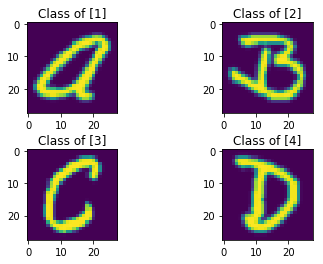

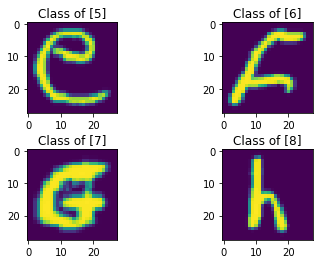

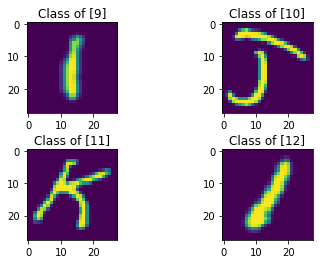

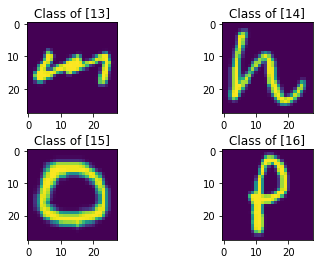

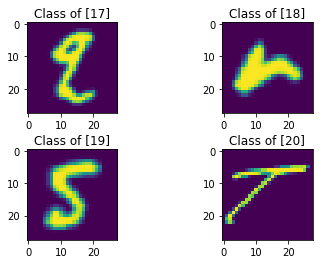

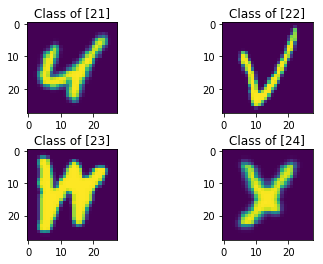

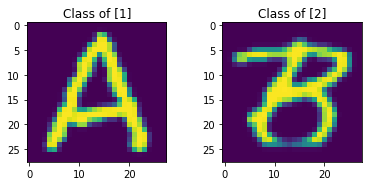

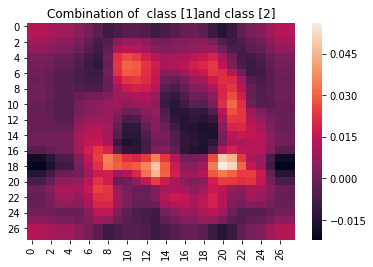

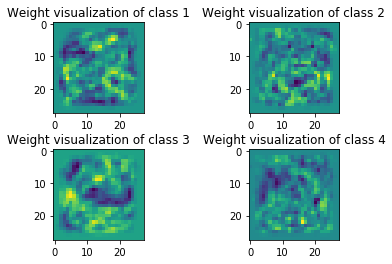

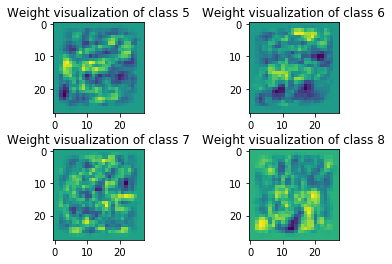

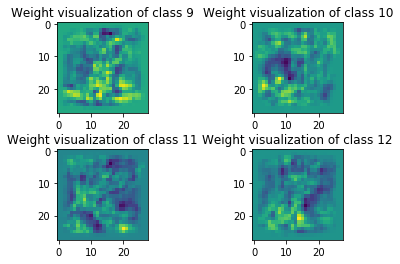

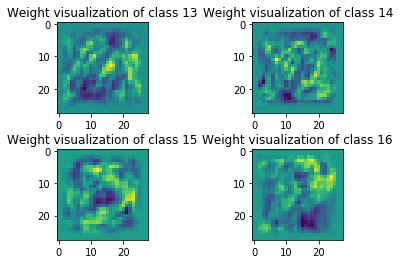

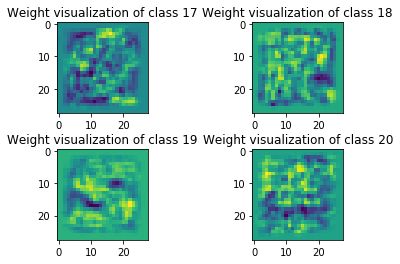

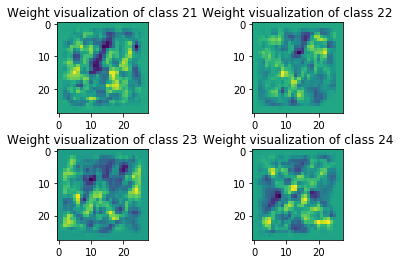

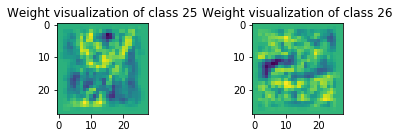

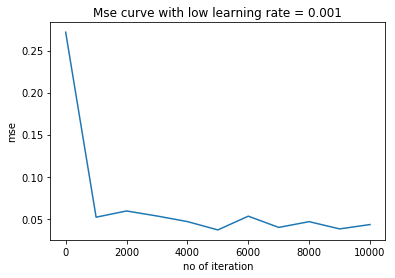

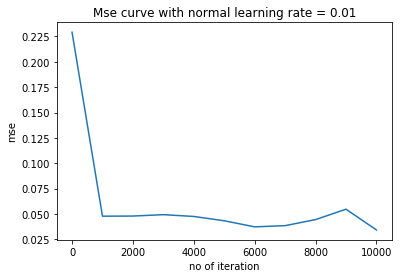

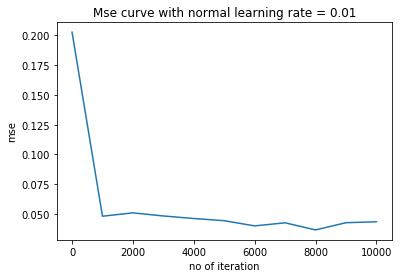

In [ ]:
#imported libraries
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
from scipy.special import expit, logit 
import random
def sena_bayraktaroglu_21502153_hw1(question):
    if question == 3:
        print("Fill here")

drive.mount('/content/gdrive')
#!ls /content/gdrive/My\ Drive/machine
root = '/content/gdrive/My Drive/neural_networks/HW1/numpy_files/'
print("HW 1 question 3") 
        
##directory of numpy files which are downloaded by moodle
directory_of_train_x =root + 'train_images.npy'
directory_of_train_y = root +'train_labels.npy'
directory_of_test_x = root +'test_images.npy'
directory_of_test_y =root +'test_labels.npy'

## convert numpy files into numpy arrays 
train_images = np.load(directory_of_train_x)
train_labels = np.load(directory_of_train_y)
test_images = np.load(directory_of_test_x)
test_labels = np.load(directory_of_test_y)

def show_4_image(numpy_array_of_pixels,numpy_array_label,figure_no):

    plt.subplot(2, 2, figure_no)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.imshow(numpy_array_of_pixels)
    plt.title(numpy_array_label)

def view_samples_from_each_class(train_images,train_labels):   
  for j in range(1,7):
      a = 0  
      plt.figure()
      for i in range((j-1)*800,(j*800)-1,200):
        a = a + 1 
        show_4_image(train_images[:,:,i],"Class of " +str(train_labels[i]),a)
  a = 0  
  plt.figure()
  for i in range(4800,5199,200):
        a = a + 1 
        show_4_image(train_images[:,:,i],"Class of " +str(train_labels[i]),a)

def correlation_btw_pairs(index_sample_1,index_sample_2,train_images,train_labels):
    import seaborn as sns
   
    sample_1 = np.asarray(train_images[:,:,index_sample_1])
    sample_2 =  np.asarray(train_images[:,:,index_sample_2])
    
    plt.subplot(1, 2,1)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.imshow(train_images[:,:,index_sample_1])
    plt.title("Class of " +  str(train_labels[index_sample_1]))
    
    plt.subplot(1, 2,2)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.imshow(train_images[:,:,index_sample_2])
    plt.title("Class of " + str(train_labels[index_sample_2]))
 
    print("Covariance and correlation between samples")
    covariance = np.dot((sample_1-np.mean(sample_1)),(sample_2-np.mean(sample_2)))/(len(sample_1)*len(sample_1[0]))
    correlation = covariance/(np.std(sample_1)*np.std(sample_2))
   
  
    print("covariance")
    print(covariance)
    print("correlation")
    print(correlation)
    
    plt.figure()
    plt.title("Combination of  " + "class " + str(train_labels[index_sample_1]) +"and class " + str(train_labels[index_sample_2]))
    sns.heatmap(correlation)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0) 

def generate_weights_for_multi_output_neuron(number_of_classes,no_of_input_features):
  mu, sigma = 0, 0.1   
  weights_for_neurons = []
  bias_terms_for_neurons = []  
  for i in range(number_of_classes):
    weights_for_neurons.append(np.random.normal(mu, sigma, no_of_input_features))
    temp = np.random.normal(mu, sigma, 1)
    bias_terms_for_neurons.append(temp[0])
  weights_for_neurons = np.asarray(weights_for_neurons)
  bias_terms_for_neurons = np.asarray(bias_terms_for_neurons)
  return weights_for_neurons,bias_terms_for_neurons
  
def new_labels_for_architecture(number_of_classes,train_labels):
  new_labels = []
  array_of_xs = decision_function(number_of_classes)
  for i in range(0,len(train_labels)):

    if int(train_labels[i]) == 1:
      new_labels.append(array_of_xs[0])
    elif int(train_labels[i]) == 2:
      new_labels.append(array_of_xs[1])
    elif int(train_labels[i]) == 3:
      new_labels.append(array_of_xs[2])
    elif int(train_labels[i]) == 4:
      new_labels.append(array_of_xs[3])
    elif int(train_labels[i]) == 5:
      new_labels.append(array_of_xs[4])
    elif int(train_labels[i]) == 6:
      new_labels.append(array_of_xs[5])
    elif int(train_labels[i]) == 7:
      new_labels.append(array_of_xs[6])    
    elif int(train_labels[i]) == 8:
      new_labels.append(array_of_xs[7])
    elif int(train_labels[i]) == 9:
      new_labels.append(array_of_xs[8])
    elif int(train_labels[i]) == 10:
      new_labels.append(array_of_xs[9])
    elif int(train_labels[i]) == 11:
      new_labels.append(array_of_xs[10])
    elif int(train_labels[i]) == 12:
      new_labels.append(array_of_xs[11])
    elif int(train_labels[i]) == 13:
      new_labels.append(array_of_xs[12])
    elif int(train_labels[i]) == 14:
      new_labels.append(array_of_xs[13])
    elif int(train_labels[i]) == 15:
      new_labels.append(array_of_xs[14])  
    elif int(train_labels[i]) == 16:
      new_labels.append(array_of_xs[15]) 
    elif int(train_labels[i]) == 17:
      new_labels.append(array_of_xs[16])    
    elif int(train_labels[i]) == 18:
      new_labels.append(array_of_xs[17])
    elif int(train_labels[i]) == 19:
      new_labels.append(array_of_xs[18])
    elif int(train_labels[i]) == 20:
      new_labels.append(array_of_xs[19])
    elif int(train_labels[i]) == 21:
      new_labels.append(array_of_xs[20])
    elif int(train_labels[i]) == 22:
      new_labels.append(array_of_xs[21])
    elif int(train_labels[i]) == 23:
      new_labels.append(array_of_xs[22])
    elif int(train_labels[i]) == 24:
      new_labels.append(array_of_xs[23])
    elif int(train_labels[i]) == 25:
      new_labels.append(array_of_xs[24])  
    elif int(train_labels[i]) == 26:
      new_labels.append(array_of_xs[25]) 
  return new_labels        
def decision_function(number_of_classes):
  x = []
  array_of_xs = []
  for i in range(number_of_classes):
    x.append(0)
  for i in range(number_of_classes):
    temp = x.copy()
    temp[i] = 1
    array_of_xs.append(temp)
  return array_of_xs 
def activation_function(x):
  prob1 =(1-expit(-(x))) 
  prob2 =1*expit(-(x))
  return prob1,prob2
def predict_y(sample_image,weights,bias_terms):  
  predicted_label = []
  for i in range(len(weights)):
    prob1, prob2 = activation_function(sum(sample_image*weights[i])+bias_terms[i])
    if prob1 > prob2:
      temp =1 
    else:
      temp = 0 
    predicted_label.append(temp)   
  return predicted_label
def predict_all_labels(sample_images,new_labels,weights,bias_terms): 
  accuracy = 0
  loss = 0
  mse = 0
  for i in range(0,len(new_labels)):    
    make_flat = np.asarray(sample_images[:,:,i]).flatten()
    predicted_label = predict_y(make_flat,weights,bias_terms)
    error = sum((np.asarray(predicted_label)-np.asarray(new_labels[i]))**2)
    mse = mse + error
    if predicted_label == new_labels[i]:
      accuracy = accuracy + 1 
    else: 
      loss = loss + 1      
  mse = mse/(len(new_labels)*len(predicted_label))    
  return accuracy, (1/len(new_labels))*(loss),mse

def gradient_descent_rule(one_sample_pixel_array,target_label,output_label,weights_array,bias_terms_array,train_images,new_labels,learning_rate):
 

  t_o = learning_rate*np.asarray(target_label-output_label)
  delta_w_array = []
  delta_bias_terms_array = []
  
  for i in range(len(t_o)):
    delta_w_array.append(t_o[i]*one_sample_pixel_array)
    delta_bias_terms_array.append(t_o[i])
  
  delta_w_array= np.asarray(delta_w_array)
  delta_bias_terms_array = np.asarray(delta_bias_terms_array)
  bias_terms_array = bias_terms_array + delta_bias_terms_array
  weights_array = weights_array + delta_w_array

  return weights_array, bias_terms_array




def single_layer_perceptron_tuned_learning_rate(no_of_iterations,number_of_classes,train_labels,train_images,no_of_input_features):
  mse_array = []
  learning_rate = 0.125
  print(" ")
  print("STARTED TO TRAIN SINGLE LAYER PERCEPTRON")
  weights_for_neurons,bias_terms_for_neurons = generate_weights_for_multi_output_neuron(number_of_classes,no_of_input_features)
  new_labels = new_labels_for_architecture(number_of_classes,train_labels)
  max_value = 0
  for i in range(0,no_of_iterations):
    random_index = random.randint(1,len(new_labels)-1)
    target_label = np.asarray(new_labels[random_index])
    sample_image = np.asarray(train_images[:,:,random_index]).flatten()
    output_label = np.asarray(predict_y(sample_image,weights_for_neurons,bias_terms_for_neurons))
    if i == 2000:
      print("Learning rate",learning_rate)
      learning_rate = 0.0625 
      #weights_for_neurons,bias_terms_for_neurons = save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy
    if i == 3000:
      print("Learning rate",learning_rate)
      learning_rate = 0.03125    
      #weights_for_neurons,bias_terms_for_neurons = save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy
    if i == 4000:
      print("Learning rate",learning_rate)
      learning_rate =  learning_rate/2
      #weights_for_neurons,bias_terms_for_neurons = save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy
    if i == 6000:
      print("Learning rate",learning_rate)
      learning_rate =  0.01
      #weights_for_neurons,bias_terms_for_neurons = save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy
    if i == 8000:
      print("Learning rate",learning_rate)
      learning_rate = learning_rate/2
      weights_for_neurons,bias_terms_for_neurons = save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy
    
    #if i != 0:
        #weights_for_neurons,bias_terms_for_neurons = save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy
    
    weights_for_neurons,bias_terms_for_neurons = gradient_descent_rule(sample_image,target_label,output_label,weights_for_neurons,bias_terms_for_neurons,train_images,new_labels,learning_rate)
    if i % (1000) ==0 and i > 0:
      print(" ")
      print(" ")
      accuracy,loss,mse = predict_all_labels(train_images,new_labels,weights_for_neurons,bias_terms_for_neurons)  
      print("Sample's Label", int(train_labels[random_index]))
      print(i,"th iteration")
      print("Number of correct results ",accuracy )
      percentage_accuracy = 100*(accuracy/len(new_labels))
      if percentage_accuracy > max_value:
        save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy = weights_for_neurons,bias_terms_for_neurons
      max_value = max(max_value,percentage_accuracy)
      print("Percentage accuracy %",  percentage_accuracy )
      print("Max accuracy value %",max_value)
      print("Loss % ",loss)
      print("Mean squared error ", mse)
      mse_array.append(mse) 
  return save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy,mse_array 

def single_layer_perceptron(no_of_iterations,number_of_classes,train_labels,train_images,learning_rate,no_of_input_features):
  mse_array = []
  x_indexes = []
  print(" ")
  print("STARTED TO TRAIN SINGLE LAYER PERCEPTRON")
  weights_for_neurons,bias_terms_for_neurons = generate_weights_for_multi_output_neuron(number_of_classes,no_of_input_features)
  new_labels = new_labels_for_architecture(number_of_classes,train_labels)
  max_value = 0
  for i in range(0,no_of_iterations):
    random_index = random.randint(1,len(new_labels)-1)
    target_label = np.asarray(new_labels[random_index])
    sample_image = np.asarray(train_images[:,:,random_index]).flatten()
    output_label = np.asarray(predict_y(sample_image,weights_for_neurons,bias_terms_for_neurons))
    weights_for_neurons,bias_terms_for_neurons = gradient_descent_rule(sample_image,target_label,output_label,weights_for_neurons,bias_terms_for_neurons,train_images,new_labels,learning_rate)
    if i % (1000) ==0:
      print(" ")
      print(" ")
      accuracy,loss,mse = predict_all_labels(train_images,new_labels,weights_for_neurons,bias_terms_for_neurons)  
      print("Sample's Label", int(train_labels[random_index]))
      print(i,"th iteration")
      print("Number of correct results ",accuracy )
      percentage_accuracy = 100*(accuracy/len(new_labels))
      if percentage_accuracy > max_value:
        save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy = weights_for_neurons,bias_terms_for_neurons
      max_value = max(max_value,percentage_accuracy)
      print("Percentage accuracy %",  percentage_accuracy )
      print("Max accuracy value %",max_value)
      print("Loss % ",loss)
      print("Mean squared error ", mse)
      mse_array.append(mse) 
      x_indexes.append(i)
  return save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy,mse_array,x_indexes  


def q3_a():
  print("QUESTION 3-a")
  from matplotlib import pyplot as plt
  print("View Samples From Each Class")
  view_samples_from_each_class(train_images,train_labels)
  correlation_btw_pairs(1,201,train_images,train_labels)

def q3_b():
  print("QUESTION 3-b")
  number_of_classes = 26  
  no_of_input_features = 784
  no_of_iterations = 11000 
  save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy,mse_array = single_layer_perceptron_tuned_learning_rate(no_of_iterations,number_of_classes,train_labels,train_images,no_of_input_features)
  new_test_labels = new_labels_for_architecture(number_of_classes,test_labels)
  accuracy,loss,mse = predict_all_labels(test_images,new_test_labels,save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy) 
  print(100*(accuracy/len(new_test_labels)))
  print(len(new_test_labels))
  from matplotlib import pyplot as plt
  x = 0  
  for j in range(6):
    a = 0  
    plt.figure()
    for i in range(4):
      a = a + 1 
      show_this = np.reshape(save_weights_for_max_accuracy[x], (28, 28))
      show_4_image(show_this,"Weight visualization of class " + str(x+1),a)
      x = x + 1   
  a = 0  
  plt.figure()
  for i in range(0,2):
    a = a + 1 
    show_this = np.reshape(save_weights_for_max_accuracy[x], (28, 28))
    show_4_image(show_this,"Weight visualization of class " + str(x+1),a)
    x = x + 1


def q3_c_d():  
  number_of_classes = 26  
  no_of_input_features = 784
  no_of_iterations = 11000 
  print("QUESTION 3-c-d")
  print(" ")
  print("Performance of tuned network")
  save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy,mse_array = single_layer_perceptron_tuned_learning_rate(no_of_iterations,number_of_classes,train_labels,train_images,no_of_input_features)
  new_test_labels = new_labels_for_architecture(number_of_classes,test_labels)
  accuracy,loss,mse = predict_all_labels(test_images,new_test_labels,save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy) 
  print("Accuracy ",100*(accuracy/len(new_test_labels)))
  print("Mean Squared Error ",mse)
  
  print(" ")
  print("Performance with low learning rate = 0.001")  
  low_learning_rate = 0.001
  save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy,mse_array,x_indexes = single_layer_perceptron(no_of_iterations,number_of_classes,train_labels,train_images,low_learning_rate,no_of_input_features)  
  new_test_labels = new_labels_for_architecture(number_of_classes,test_labels)
  accuracy,loss,mse = predict_all_labels(test_images,new_test_labels,save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy) 
  print("Accuracy ",100*(accuracy/len(new_test_labels)))
  print("Mean Squared Error ",mse)
  plt.figure()
  plt.title('Mse curve with low learning rate = 0.001')
  plt.ylabel('mse')
  plt.xlabel('no of iteration')
  plt.plot(x_indexes,mse_array)  
  
  print(" ")
  print("Performance with normal learning rate = 0.01")  
  normal_learning_rate = 0.01
  save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy,mse_array,x_indexes = single_layer_perceptron(no_of_iterations,number_of_classes,train_labels,train_images,normal_learning_rate,no_of_input_features)
  new_test_labels = new_labels_for_architecture(number_of_classes,test_labels)
  accuracy,loss,mse = predict_all_labels(test_images,new_test_labels,save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy) 
  print("Accuracy ",100*(accuracy/len(new_test_labels)))
  print("Mean Squared Error ",mse)
  plt.figure()
  plt.title('Mse curve with normal learning rate = 0.01')
  plt.ylabel('mse')
  plt.xlabel('no of iteration')
  plt.plot(x_indexes,mse_array)
  
  print(" ")
  print("Performance with high learning rate = 0.1")  
  high_learning_rate = 0.1
  save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy,mse_array,x_indexes = single_layer_perceptron(no_of_iterations,number_of_classes,train_labels,train_images,high_learning_rate,no_of_input_features)
  new_test_labels = new_labels_for_architecture(number_of_classes,test_labels)
  accuracy,loss,mse = predict_all_labels(test_images,new_test_labels,save_weights_for_max_accuracy,save_bias_terms_for_max_accuracy) 
  print("Accuracy ",100*(accuracy/len(new_test_labels)))
  print("Mean Squared Error ",mse)
  plt.figure()
  plt.title('Mse curve with high learning rate = 0.1')
  plt.ylabel('mse')
  plt.xlabel('no of iteration')
  plt.plot(x_indexes,mse_array)
q3_a()   
q3_b() 
q3_c_d() 


 

37.53846153846154
1300
488


In [ ]:
def step_function(x):
  if x > 0:
    out = 1
  elif x < 0:  
    out = 0
  return out  

def hidden_layer(X):
  w__neuron_1 = [10,3,0,6,3] # X1 X3 X4 
  neuron_1_sum = -w__neuron_1[0] + w__neuron_1[1]*X[0] + w__neuron_1[2]*X[1] + w__neuron_1[3]*X[2] + w__neuron_1[4]*X[3]
  neuron_1_result = step_function(neuron_1_sum)
   
  w__neuron_2 = [4,0,-6,3,3] # not(X2) X3 X4
  neuron_2_sum = -w__neuron_2[0] + w__neuron_2[1]*X[0] + w__neuron_2[2]*X[1]+ w__neuron_2[3]*X[2] + w__neuron_2[4]*X[3]
  neuron_2_result = step_function(neuron_2_sum)
    
  w__neuron_3 = [5,-3,6,-3,0] # not(X1) X2 not(X3)
  neuron_3_sum = -w__neuron_3[0] + w__neuron_3[1]*X[0] + w__neuron_3[2]*X[1] + w__neuron_3[3]*X[2] + w__neuron_3[4]*X[3]
  neuron_3_result = step_function(neuron_3_sum) 
    
  w__neuron_4 = [6,-3,8,0,-4] # not(X1) X2 not(X4)
  neuron_4_sum = -w__neuron_4[0] + w__neuron_4[1]*X[0] + w__neuron_4[2]*X[1] + w__neuron_4[3]*X[2] + w__neuron_4[4]*X[3]
  neuron_4_result = step_function(neuron_4_sum) 
 
  return neuron_1_result,neuron_2_result,neuron_3_result, neuron_4_result

def output_neuron(neuron_1_result,neuron_2_result,neuron_3_result,neuron_4_result):
  if neuron_1_result == 1 or neuron_2_result == 1 or neuron_3_result== 1 or neuron_4_result==1:
    out = 1
  else:
    out = 0
  return out  

array_of_input = [[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]

#for i in range(len(array_of_input)):
  #neuron_1_result,neuron_2_result,neuron_3_result, neuron_4_result= hidden_layer(array_of_input[i])
  #print(output_neuron(neuron_1_result,neuron_2_result,neuron_3_result,neuron_4_result))
mu = 0
sigma = 0.2


validation_set_with_noise = []
for i in range(16):
  for j in range(25): 
    validation_set_without_noise =append(array_of_input[i])
    gaussian_noise_vector = np.random.normal(mu, sigma, 4)
    validation_set_with_noise.append(array_of_input[i]+gaussian_noise_vector)

accuracy = len(validation_set_with_noise)
for i in range(len(validation_set_with_noise)):
  neuron_1_result,neuron_2_result,neuron_3_result, neuron_4_result= hidden_layer(validation_set_without_noise [i])
  out_without_noise = output_neuron(neuron_1_result,neuron_2_result,neuron_3_result,neuron_4_result)    
  neuron_1_result,neuron_2_result,neuron_3_result, neuron_4_result= hidden_layer(validation_set_with_noise [i])
  out_with_noise = output_neuron(neuron_1_result,neuron_2_result,neuron_3_result,neuron_4_result)     
  if out_without_noise != out_with_noise 
    accuracy = accuracy-1

438
1300
